In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('HTRU_2.csv')

## Data Preprocessing

In [3]:
#Splitting the Features(x) and labels(y)
x = df.drop(['Class'], axis=1)
y = df['Class'].values

#Scaling the features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
features_scaled = scaler.fit_transform(x)

#Splitting the train and test data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)


## Supervised Learning

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, mean_absolute_error, mean_squared_error


In [5]:
# Models

log = LogisticRegression(random_state=4)
knn = KNeighborsClassifier(n_neighbors=2)
dtree = DecisionTreeClassifier(random_state=4)
rtree = RandomForestClassifier(n_estimators=100, random_state=4)
svm = SVC(random_state=4)
nb = GaussianNB()

In [13]:
# Function to create algorithm

def model_algorithm(algorithm, Xtrain, Ytrain, Xtest, Ytest, name):
    
    print("Model: %s" %name), '\n'
    
    algorithm.fit(Xtrain,Ytrain)
    prediction = algorithm.predict(Xtest)
    score_train = round(algorithm.score(Xtrain,Ytrain)*100)
    score_test = round(algorithm.score(Xtest, Ytest)*100)
    class_report = classification_report(Ytest, prediction)
    print('Train Accuracy: %s' %score_train), '%'
    print('Test Accuracy: %s' %score_test), '%', '\n'
    print('Classification report: '), '\n'
    print(class_report)
    
    plt.figure(figsize=(18,13))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(Ytest, prediction), annot=True, cmap='OrRd', fmt='d',annot_kws={'size':15})
    plt.title('Confusion Matrix of '+name, fontsize=16)
    plt.xticks(fontsize=14)    
    plt.yticks(fontsize=14)
    
    plt.subplot(222)
    fpr, tpr, thresholds = roc_curve(Ytest, prediction)
    plt.plot([0, 1], [0, 1], linestyle = "dashed" ,color="b")
    plt.plot(fpr, tpr ,color="red", label=('Area under the curve: ', round(auc(fpr, tpr), 4)))
    plt.title('ROC Curve of '+name, fontsize=16)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.legend(loc='best', fontsize=15)
    
    # metrics
    mae = round(mean_absolute_error(Ytest, prediction),4)
    mse = round(mean_squared_error(Ytest, prediction),4)
    rmse = round(np.sqrt(mse),4)
    
    print('Metrics of: %s' %name), '\n'
    print('Mean Absolute Error: %s' %mae)
    print('Mean Squred Error: %s' %mse)
    print('Root Mean Squared Error: %s' %rmse)

## Logistic Regression

Model: Logistic Regression
Train Accuracy: 98
Test Accuracy: 98


C:\Users\himan\anaconda3\envs\virtual_environment_name\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4880
           1       0.94      0.83      0.88       490

    accuracy                           0.98      5370
   macro avg       0.96      0.91      0.94      5370
weighted avg       0.98      0.98      0.98      5370

Metrics of: Logistic Regression
Mean Absolute Error: 0.0203
Mean Squred Error: 0.0203
Root Mean Squared Error: 0.1425


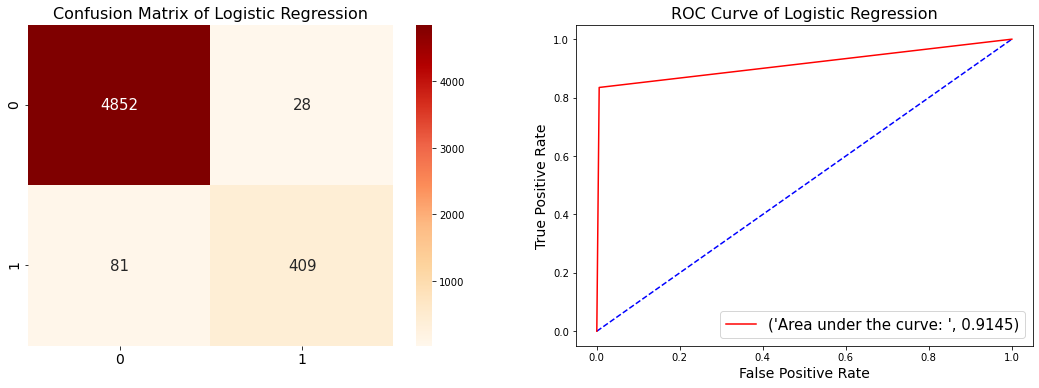

In [14]:
model_algorithm(log, x_train, y_train, x_test, y_test, 'Logistic Regression')

## K Nearest Neighbours

Model: K Nearest Neighbours
Train Accuracy: 98
Test Accuracy: 97
Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4880
           1       0.92      0.71      0.80       490

    accuracy                           0.97      5370
   macro avg       0.94      0.85      0.89      5370
weighted avg       0.97      0.97      0.97      5370

Metrics of: K Nearest Neighbours
Mean Absolute Error: 0.0326
Mean Squred Error: 0.0326
Root Mean Squared Error: 0.1806


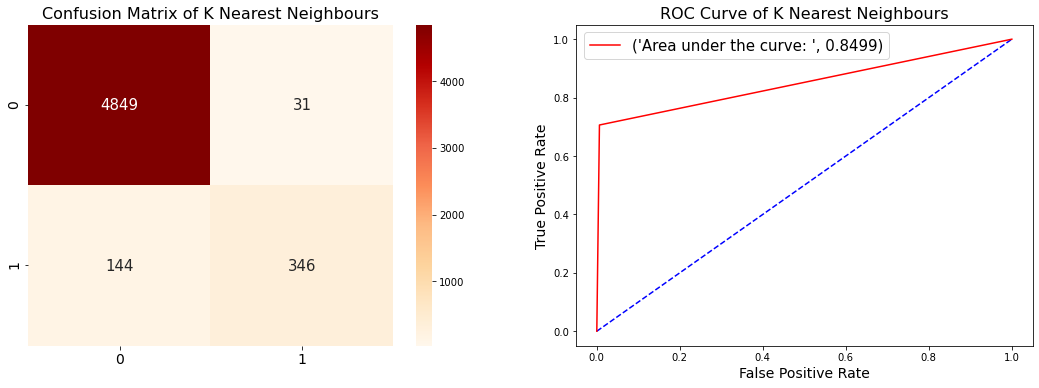

In [15]:
model_algorithm(knn, x_train, y_train, x_test, y_test, 'K Nearest Neighbours')

## Decision Tree Classifier

Model: Decision Tree Classifier
Train Accuracy: 100
Test Accuracy: 97
Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4880
           1       0.83      0.83      0.83       490

    accuracy                           0.97      5370
   macro avg       0.91      0.90      0.91      5370
weighted avg       0.97      0.97      0.97      5370

Metrics of: Decision Tree Classifier
Mean Absolute Error: 0.0313
Mean Squred Error: 0.0313
Root Mean Squared Error: 0.1769


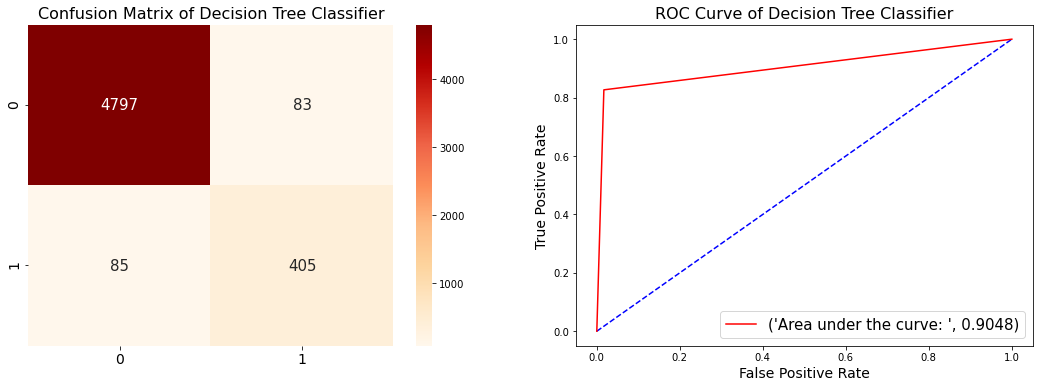

In [16]:
model_algorithm(dtree, x_train, y_train, x_test, y_test, 'Decision Tree Classifier')

## Random Forest Classifier

Model: Random Forest Classifier
Train Accuracy: 98
Test Accuracy: 97
Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4880
           1       0.92      0.71      0.80       490

    accuracy                           0.97      5370
   macro avg       0.94      0.85      0.89      5370
weighted avg       0.97      0.97      0.97      5370

Metrics of: Random Forest Classifier
Mean Absolute Error: 0.0326
Mean Squred Error: 0.0326
Root Mean Squared Error: 0.1806


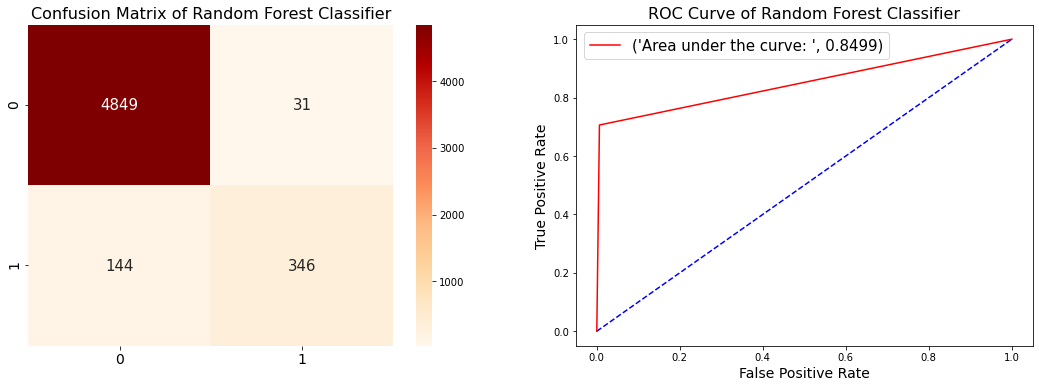

In [17]:
model_algorithm(knn, x_train, y_train, x_test, y_test, 'Random Forest Classifier')

## Support Vector Machine

Model: Support Vector Machine
Train Accuracy: 97
Test Accuracy: 97
Classification report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4880
           1       0.94      0.74      0.83       490

    accuracy                           0.97      5370
   macro avg       0.96      0.87      0.91      5370
weighted avg       0.97      0.97      0.97      5370

Metrics of: Support Vector Machine
Mean Absolute Error: 0.0281
Mean Squred Error: 0.0281
Root Mean Squared Error: 0.1676


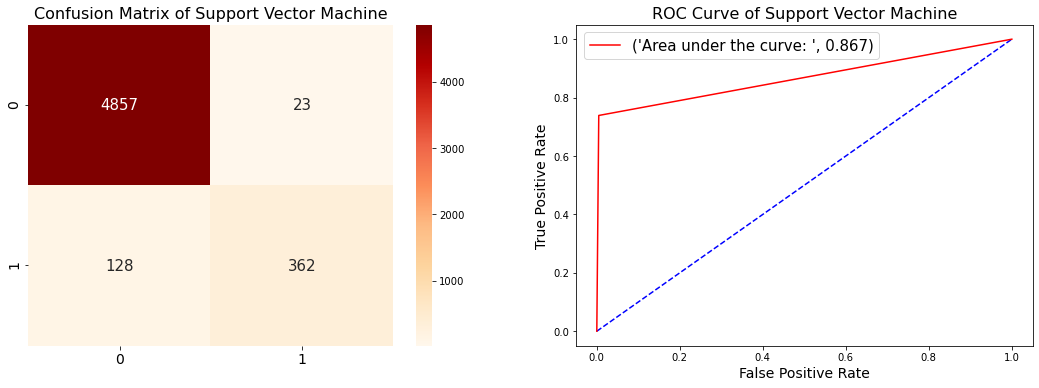

In [18]:
model_algorithm(svm, x_train, y_train, x_test, y_test, 'Support Vector Machine')

## Naive Bayesian

Model: Naive Bayesian
Train Accuracy: 94
Test Accuracy: 94
Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4880
           1       0.64      0.87      0.74       490

    accuracy                           0.94      5370
   macro avg       0.81      0.91      0.85      5370
weighted avg       0.95      0.94      0.95      5370

Metrics of: Naive Bayesian
Mean Absolute Error: 0.0562
Mean Squred Error: 0.0562
Root Mean Squared Error: 0.2371


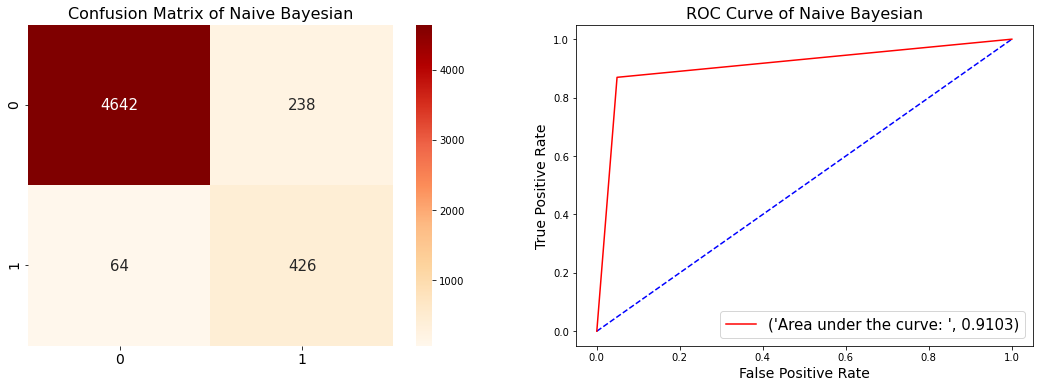

In [19]:
model_algorithm(nb, x_train, y_train, x_test, y_test, 'Naive Bayesian')